<a href="https://colab.research.google.com/github/Apaulgithub/Bike_Sharing_Prediction/blob/main/EDA_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Arindam Paul


# **Project Summary -**

Bike Seoul is a bike sharing service in the city of Seoul, South Korea. It is part of the city's efforts to promote sustainable transportation and reduce traffic congestion. The service allows residents and visitors to rent bicycles at various stations across the city and return them to any other station, providing a convenient and eco-friendly mode of transportation.
In recent years, the demand for bike rentals in Seoul has increased, leading to the need for a more efficient and effective way to manage the bike sharing operations. Accurately predicting bike demand is crucial for optimizing fleet management, ensuring the availability of bikes at high-demand locations, and reducing waste and costs.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays.
In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model  then be tested and evaluated using metrics such as mean squared error and r-squared values.
The actual data is from the Seoul city government's open data portal, and this dataset is also available on Kaggle.

So, our main goal was to achieve an accuracy of at least 85% in the bike demand predictions, which would help the city's bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time. 
We have performed lots of regression algorithms like linear regression, random forest, decision tree, gradient boosting , Xtreme gradient boosting, also we tried to do hyperparameter tuning and cross validation to improve the accuracy of the model. And finally we have decided to select Xtreme gradient boosting algorithm because it gave us high accuracy around 93% and 90% on train and test data respectively.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation systems.

# **GitHub Link -**

https://github.com/Apaulgithub/Bike_Sharing_Prediction.git

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities. The business problem is to ensure a stable supply of rental bikes in urban cities by predicting the demand for bikes at each hour. By providing a stable supply of rental bikes, the system can enhance mobility comfort for the public and reduce waiting time, leading to greater customer satisfaction.

To address this problem, we need to develop a predictive model that takes into account various factors that may influence demand, such as time of day, seasonality, weather conditions, and holidays. By accurately predicting demand, the bike sharing system operators can ensure that there is an adequate supply of bikes available at all times, which can improve the user experience and increase usage of the bike sharing system. This can have a positive impact on the sustainability of urban transportation, as it can reduce congestion, air pollution, and greenhouse gas emissions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset from github repository
data = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/Bike_Sharing_Prediction/main/SeoulBikeData.csv", encoding="unicode_escape")

### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  8760
Number of columns are:  14


### Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Checking Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Checking Missing Values/Null Values Count
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

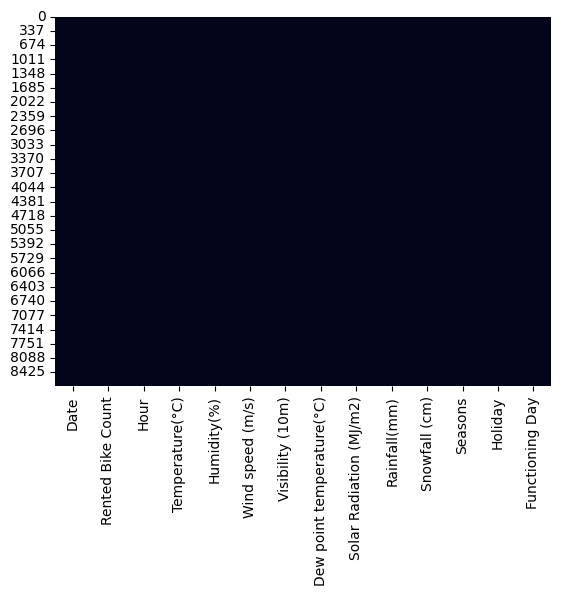

In [ ]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

The Seoul Bike Sharing Demand dataset contains information about bike rental in Seoul from 2017-2018. It includes hourly observations of 14 columns, such as the date, time, number of rented bikes, weather conditions, and other factors that may influence bike rental demand.

This dataset contains 8760 rows and 14 columns of the data.

There are no duplicate rows in the dataset.

Also there are no missing values or Null values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)

Date  Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
count         8760            8760.00  8760.00          8760.00      8760.00   
unique         365                NaN      NaN              NaN          NaN   
top     01/12/2017                NaN      NaN              NaN          NaN   
freq            24                NaN      NaN              NaN          NaN   
mean           NaN             704.60    11.50            12.88        58.23   
std            NaN             645.00     6.92            11.94        20.36   
min            NaN               0.00     0.00           -17.80         0.00   
25%            NaN             191.00     5.75             3.50        42.00   
50%            NaN             504.50    11.50            13.70        57.00   
75%            NaN            1065.25    17.25            22.50        74.00   
max            NaN            3556.00    23.00            39.40        98.00   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count            8760.00           8760.00                    8760.00   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean                1.72           1436.83                       4.07   
std                 1.04            608.30                      13.06   
min                 0.00             27.00                     -30.60   
25%                 0.90            940.00                      -4.70   
50%                 1.50           1698.00                       5.10   
75%                 2.30           2000.00                      14.80   
max                 7.40           2000.00                      27.20   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count                   8760.00       8760.00        8760.00    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                       0.57          0.15           0.08     NaN   
std                        0.87          1.13           0.44     NaN   
min                        0.00          0.00           0.00     NaN   
25%                        0.00          0.00           0.00     NaN   
50%                        0.01          0.00           0.00     NaN   
75%                        0.93          0.00           0.00     NaN   
max                        3.52         35.00           8.80     NaN   

           Holiday Functioning Day  
count         8760            8760  
unique           2               2  
top     No Holiday             Yes  
freq          8328            8465  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

### Variables Description 

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


<b>Attribute Information : </b>

*   **Date** : The date of the observation.
*   **Rented Bike Count** : The number of bikes rented during the observation period.
*   **Hour** : The hour of the day when the observation was taken.
*   **Temperature(°C)** : The temperature in Celsius at the time of observation.
*   **Humidity(%)** : The percentage of humidity at the time of observation.
*   **Wind speed (m/s)** : The wind speed in meters per second at the time of observation.
*   **Visibility (10m)** : The visibility in meters at the time of observation.
*   **Dew point temperature(°C)** : The dew point temperature in Celsius at the time of observation.
*   **Solar Radiation (MJ/m2)** : The amount of solar radiation in mega-joules per square meter at the time of observation.
*   **Rainfall(mm)** : The amount of rainfall in millimeters during the observation period.
*   **Snowfall(cm)** : The amount of snowfall in centimeters during the observation period.
*   **Seasons** : The season of the year when the observation was taken.
*   **Holiday** : Whether the observation was taken on a holiday or not.
*   **Functioning Day** : Whether the bike sharing system was operating normally or not during the observation period.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [ ]:
# Renaming the columns
data_2.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
data_2.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [ ]:
# converting date variable into datetime datatype
data_2['date'] = data_2['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Creating new columns for day and month
data_2['month'] = data_2['date'].apply(lambda x : x.month)
data_2['day_of_week'] = data_2['date'].apply(lambda x : x.isoweekday())

In [ ]:
# engineering new feature 'weekend' from day_of_week
data_2['weekend'] = data_2['day_of_week'].apply(lambda x: 1 if x>5 else 0)

In [ ]:
data_2.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   visibility  dew_point_temp  solar_radiation  rainfall  snowfall seasons  \
0        2000           -17.6              0.0       0.0       0.0  Winter   
1        2000           -17.6              0.0       0.0       0.0  Winter   
2        2000           -17.7              0.0       0.0       0.0  Winter   
3        2000           -17.6              0.0       0.0       0.0  Winter   
4        2000           -18.6              0.0       0.0       0.0  Winter   

      holiday func_day  month  day_of_week  weekend  
0  No Holiday      Yes     12            5        0  
1  No Holiday      Yes     12            5        0  
2  No Holiday      Yes     12            5        0  
3  No Holiday      Yes     12            5        0  
4  No Holiday      Yes     12            5        0

In [ ]:
# Describe New Dataset
data_2.describe(include='all').round(2)

date  rented_bike_count     hour  temperature  \
count                  8760            8760.00  8760.00      8760.00   
unique                  365                NaN      NaN          NaN   
top     2017-12-01 00:00:00                NaN      NaN          NaN   
freq                     24                NaN      NaN          NaN   
first   2017-12-01 00:00:00                NaN      NaN          NaN   
last    2018-11-30 00:00:00                NaN      NaN          NaN   
mean                    NaN             704.60    11.50        12.88   
std                     NaN             645.00     6.92        11.94   
min                     NaN               0.00     0.00       -17.80   
25%                     NaN             191.00     5.75         3.50   
50%                     NaN             504.50    11.50        13.70   
75%                     NaN            1065.25    17.25        22.50   
max                     NaN            3556.00    23.00        39.40   

        humidity  wind_speed  visibility  dew_point_temp  solar_radiation  \
count    8760.00     8760.00     8760.00         8760.00          8760.00   
unique       NaN         NaN         NaN             NaN              NaN   
top          NaN         NaN         NaN             NaN              NaN   
freq         NaN         NaN         NaN             NaN              NaN   
first        NaN         NaN         NaN             NaN              NaN   
last         NaN         NaN         NaN             NaN              NaN   
mean       58.23        1.72     1436.83            4.07             0.57   
std        20.36        1.04      608.30           13.06             0.87   
min         0.00        0.00       27.00          -30.60             0.00   
25%        42.00        0.90      940.00           -4.70             0.00   
50%        57.00        1.50     1698.00            5.10             0.01   
75%        74.00        2.30     2000.00           14.80             0.93   
max        98.00        7.40     2000.00           27.20             3.52   

        rainfall  snowfall seasons     holiday func_day    month  day_of_week  \
count    8760.00   8760.00    8760        8760     8760  8760.00       8760.0   
unique       NaN       NaN       4           2        2      NaN          NaN   
top          NaN       NaN  Spring  No Holiday      Yes      NaN          NaN   
freq         NaN       NaN    2208        8328     8465      NaN          NaN   
first        NaN       NaN     NaN         NaN      NaN      NaN          NaN   
last         NaN       NaN     NaN         NaN      NaN      NaN          NaN   
mean        0.15      0.08     NaN         NaN      NaN     6.53          4.0   
std         1.13      0.44     NaN         NaN      NaN     3.45          2.0   
min         0.00      0.00     NaN         NaN      NaN     1.00          1.0   
25%         0.00      0.00     NaN         NaN      NaN     4.00          2.0   
50%         0.00      0.00     NaN         NaN      NaN     7.00          4.0   
75%         0.00      0.00     NaN         NaN      NaN    10.00          6.0   
max        35.00      8.80     NaN         NaN      NaN    12.00          7.0   

        weekend  
count   8760.00  
unique      NaN  
top         NaN  
freq        NaN  
first       NaN  
last        NaN  
mean       0.28  
std        0.45  
min        0.00  
25%        0.00  
50%        0.00  
75%        1.00  
max        1.00

In [ ]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [ ]:
# defining dependent variable
dependent_variable = ['rented_bike_count']

In [ ]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?

From the Date column, 'month' and 'day of the week' columns are created.

From the 'day of the week' column, 'weekend' column is created where 6 and 7 are the weekends (Saturday and Sunday).

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Dependent variable Distribution

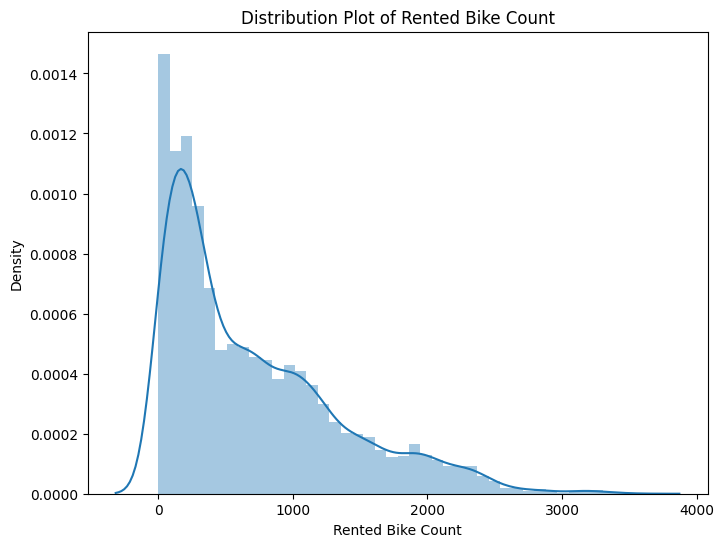

In [ ]:
# Chart-1 Visualization code for distribution of target variable
plt.figure(figsize=(8,6))
sns.distplot(data_2['rented_bike_count'])
plt.xlabel("Rented Bike Count")
plt.title('Distribution Plot of Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also known as a histogram-kernel density estimate (KDE) plot. It is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables. It also allows to check if the data is following normal distribution or not.

Thus, I used the histogram plot to analyse the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

From above distribution plot of dependent variable rented bike, we can clearly see that the distribution is positively skewed (Right skewed).

It means that distribution is not symmetric around the the mean.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definately from this insight we got to know that our data is not normally distributed. So, before doing or implementing any model on this data we need to normalise this data.

#### Chart - 2 : Distribution/ Box plot

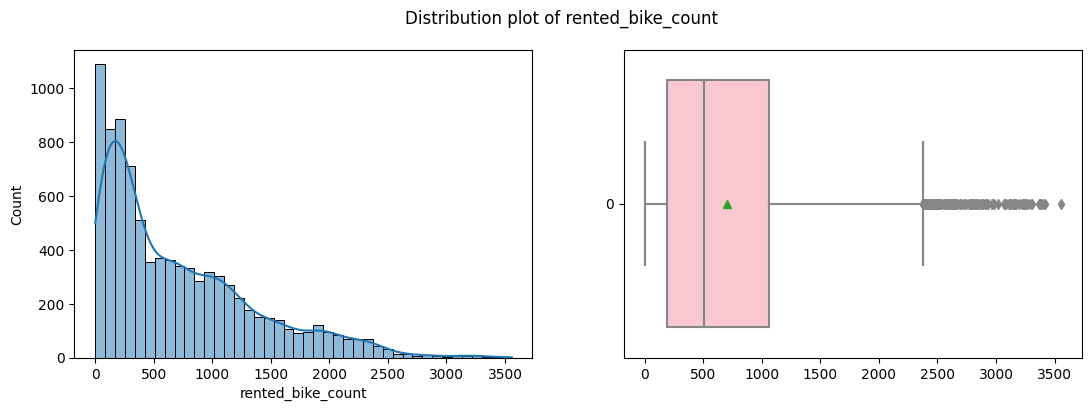

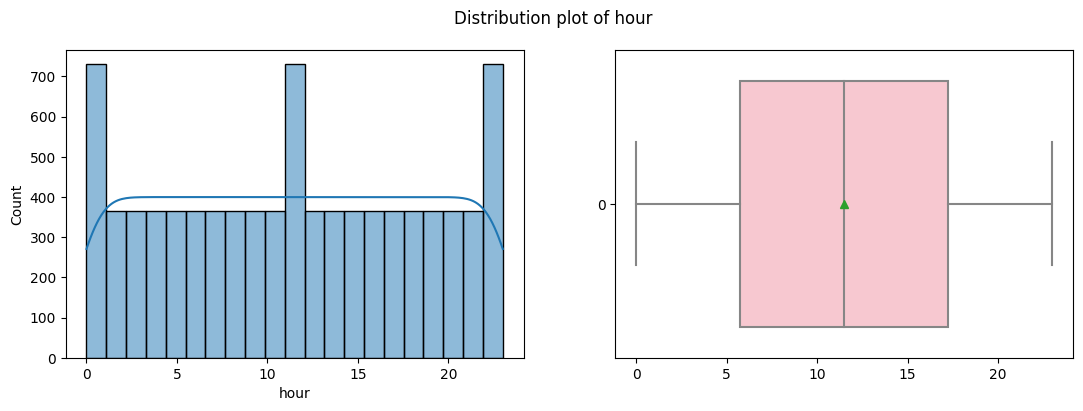

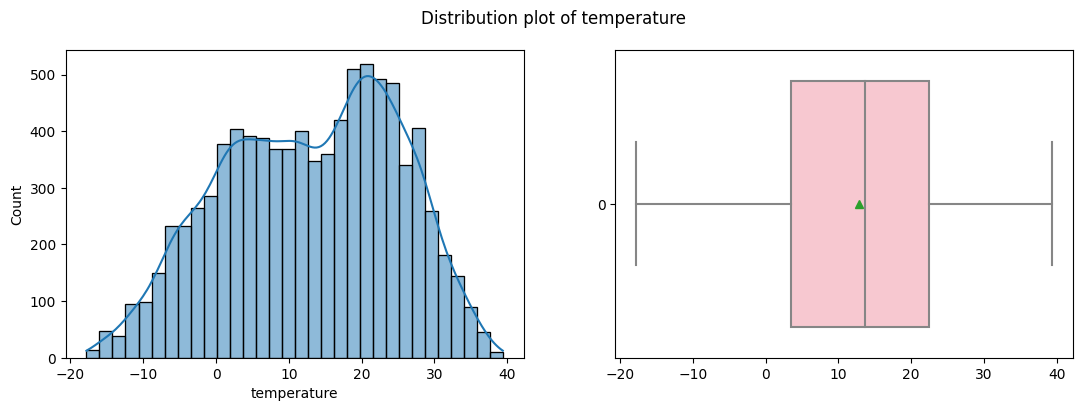

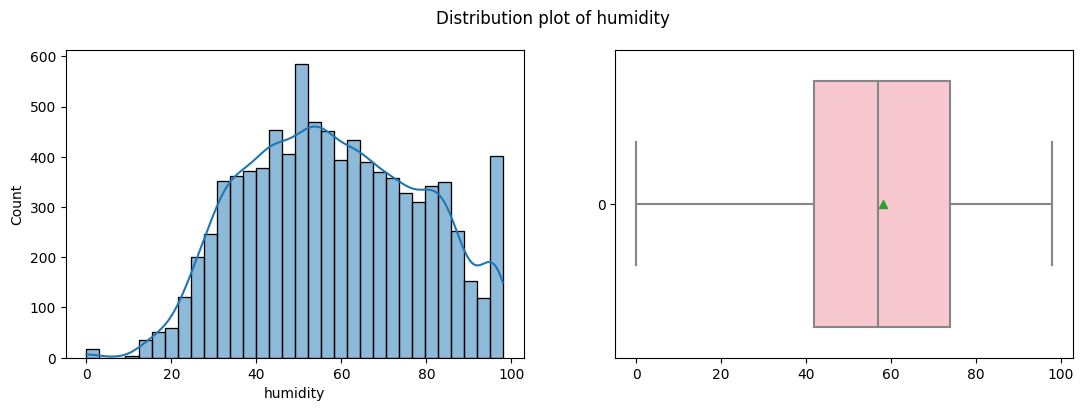

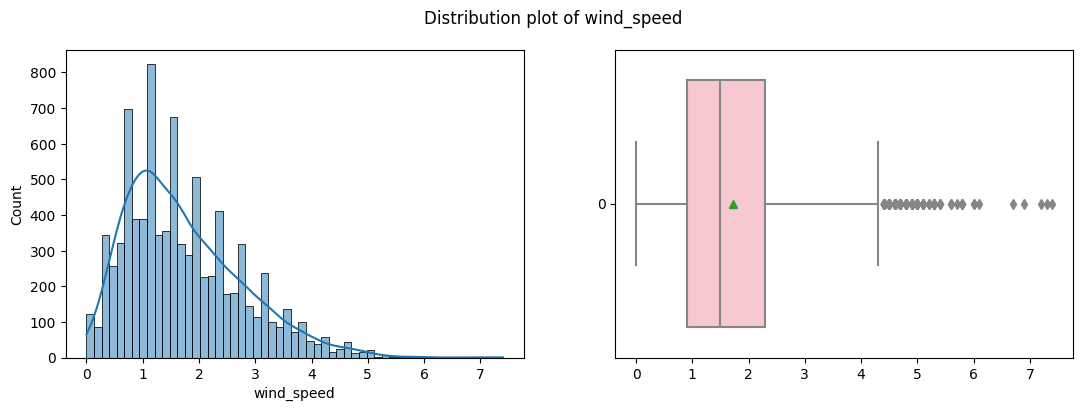

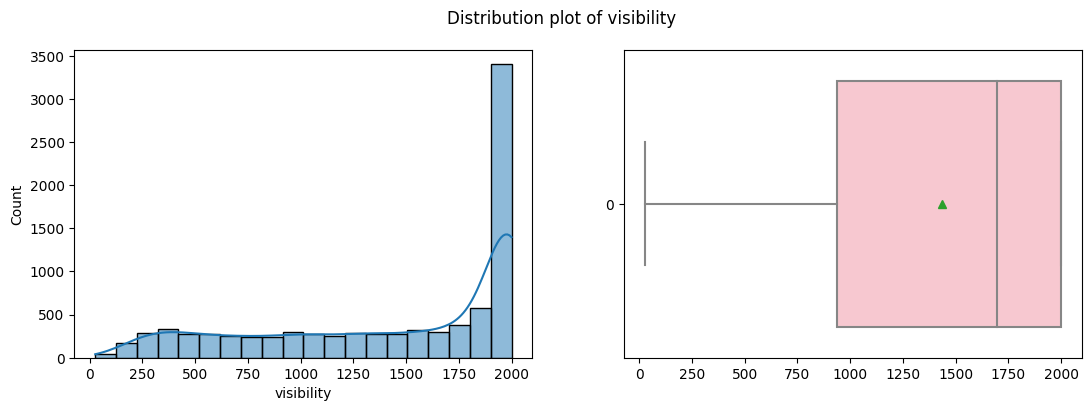

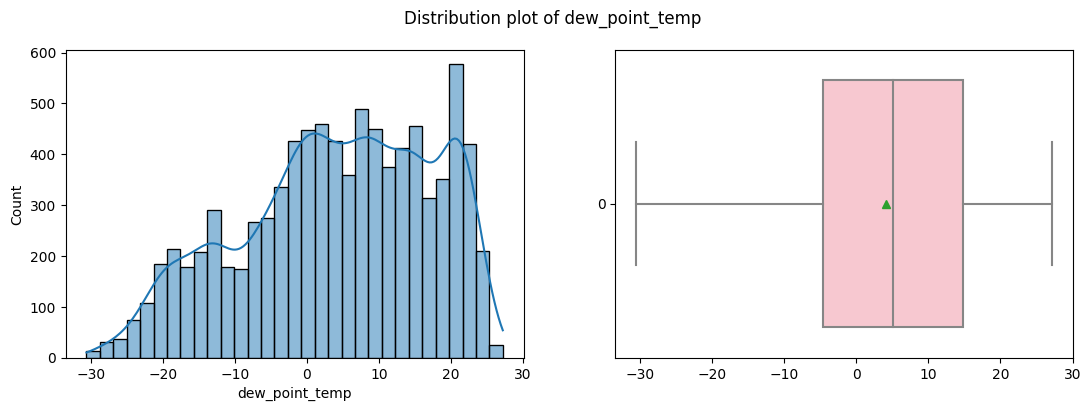

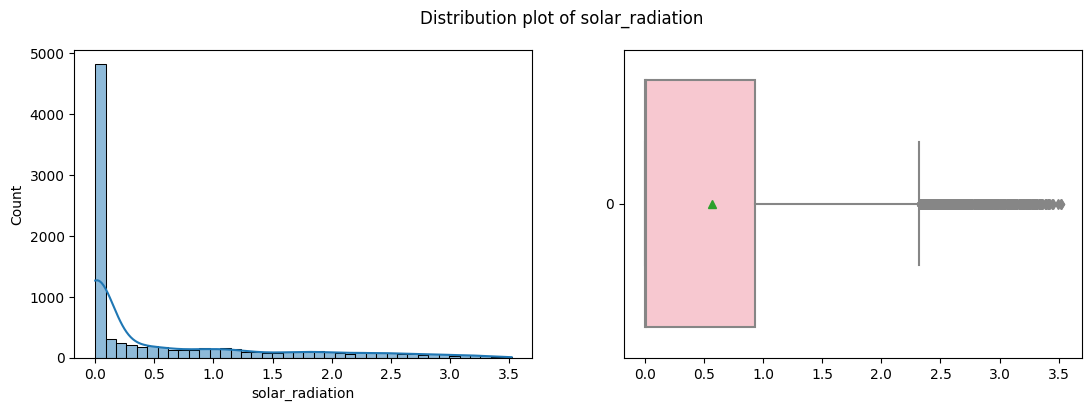

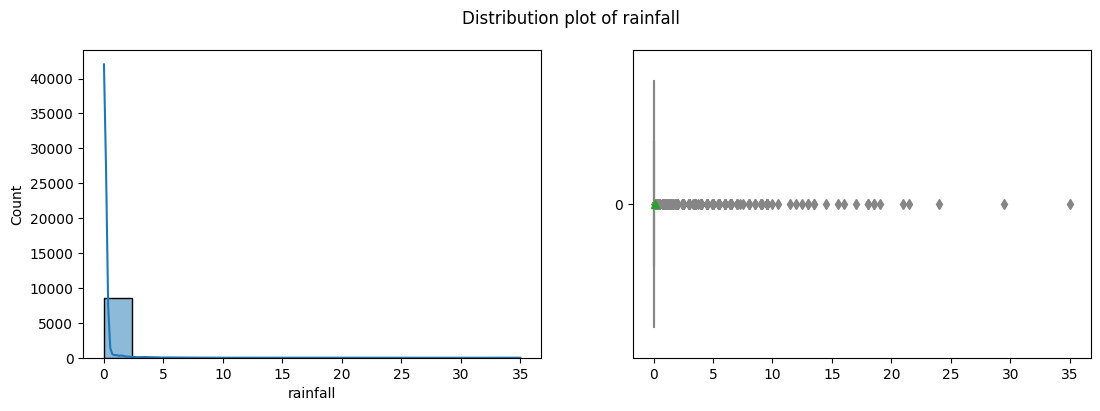

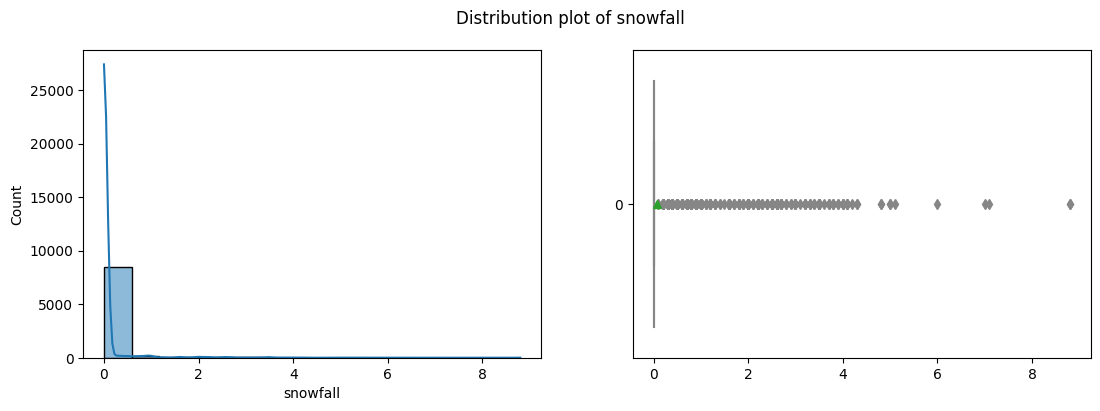

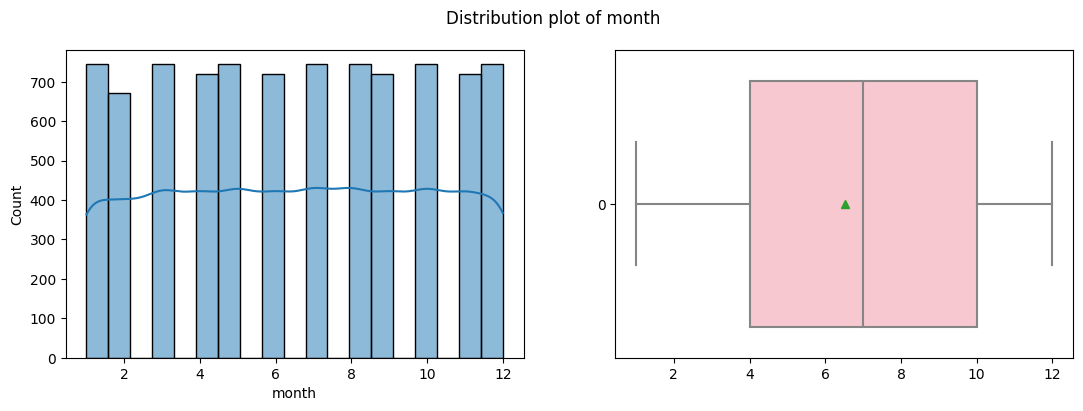

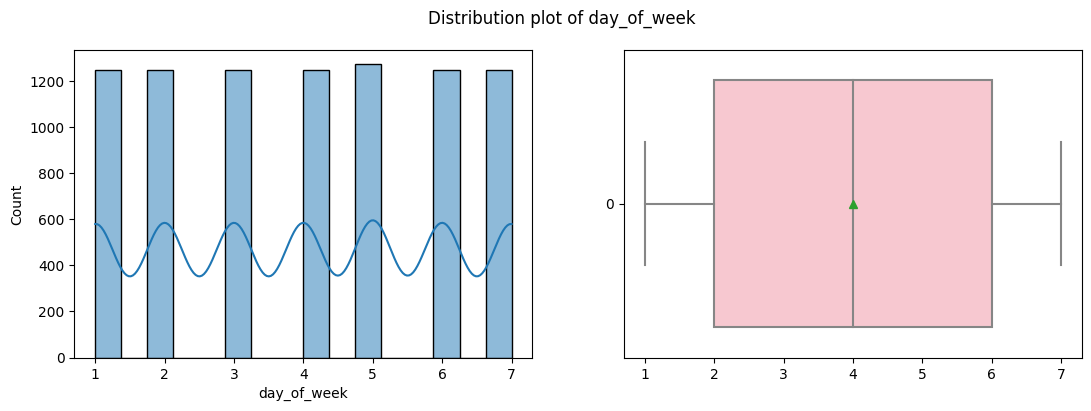

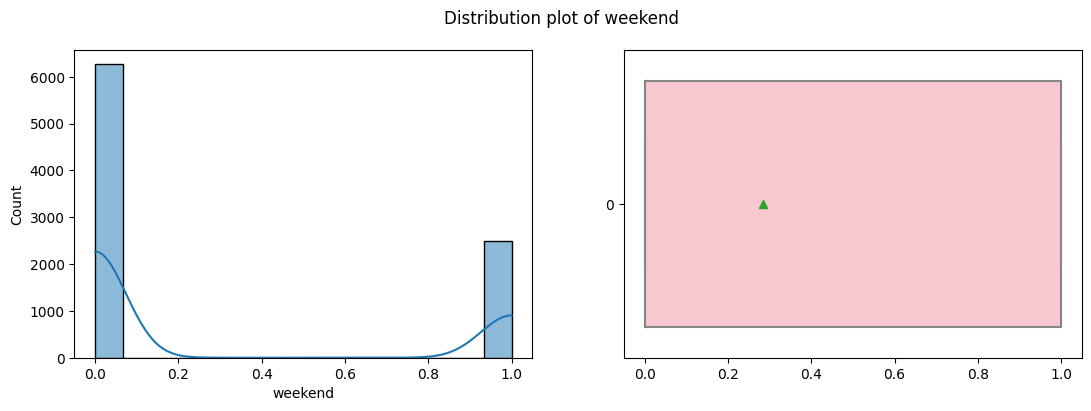

In [ ]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, we used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, we used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From above univariate analysis of all continuous feature variables. We got to know that only tempture and humidity columns are looks normally distributed others shows the different distributions. 

Also we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

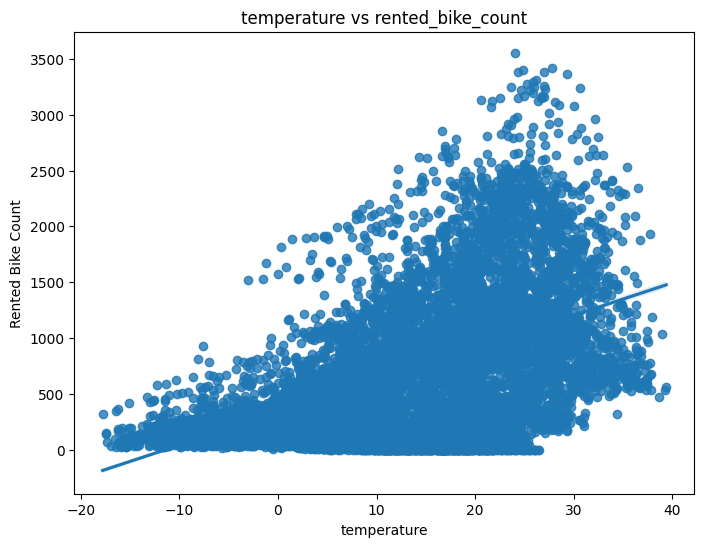

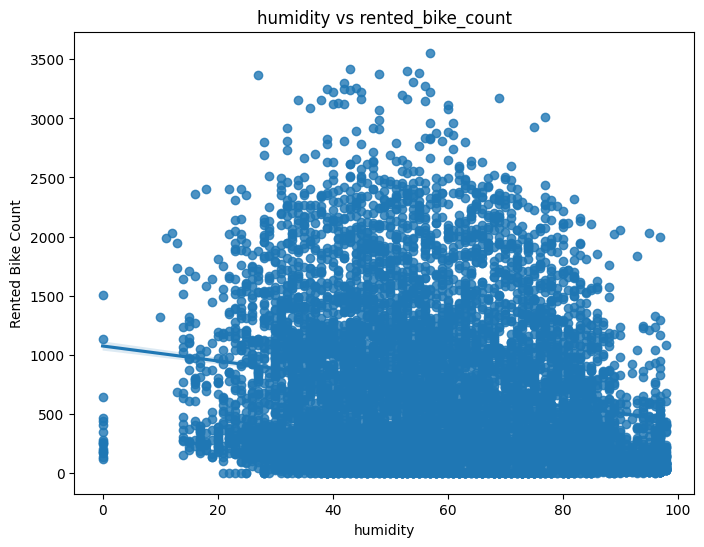

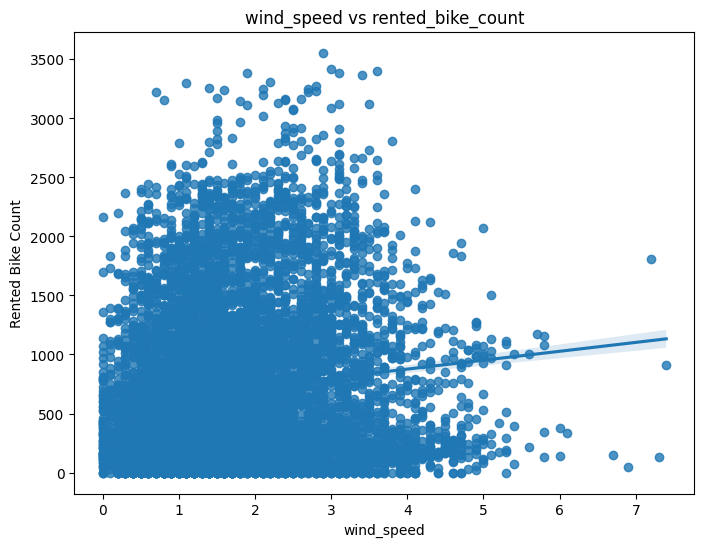

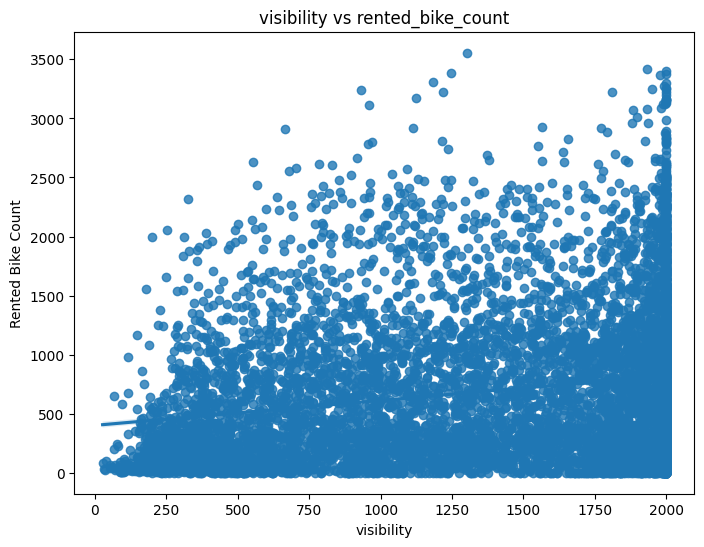

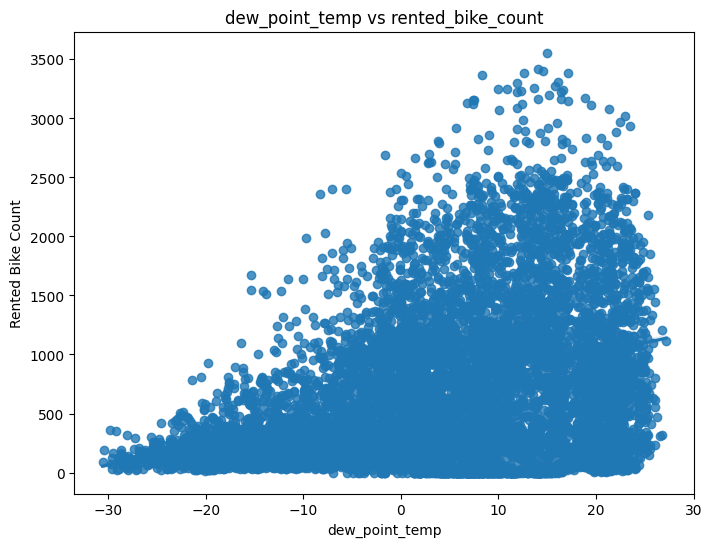

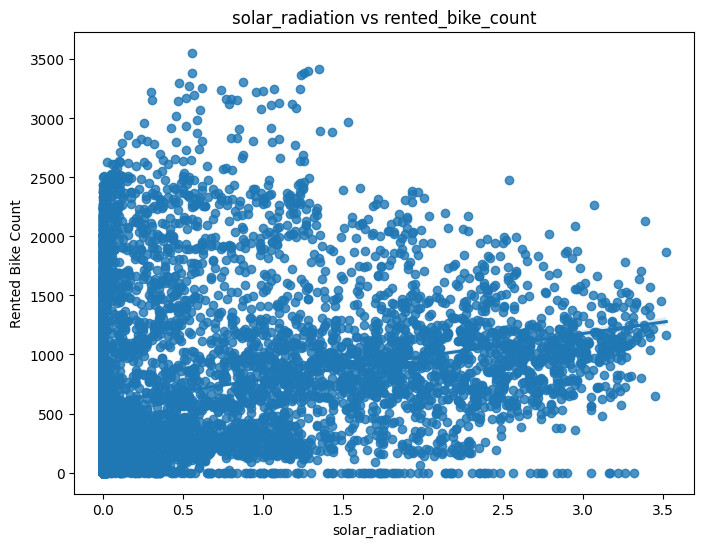

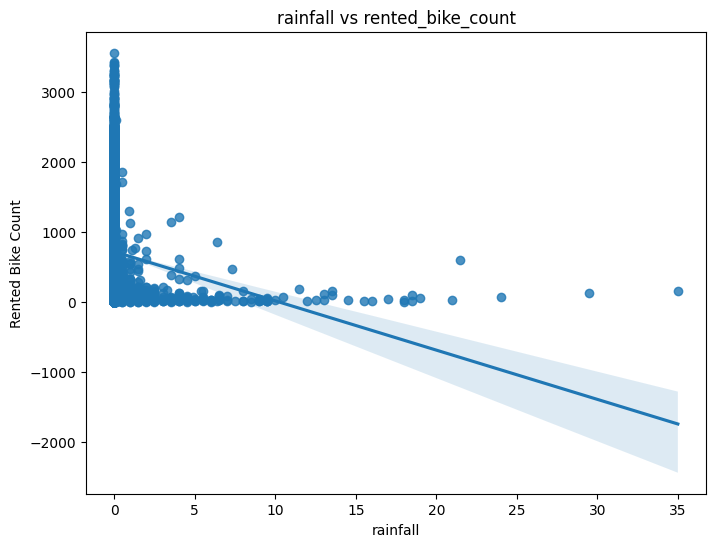

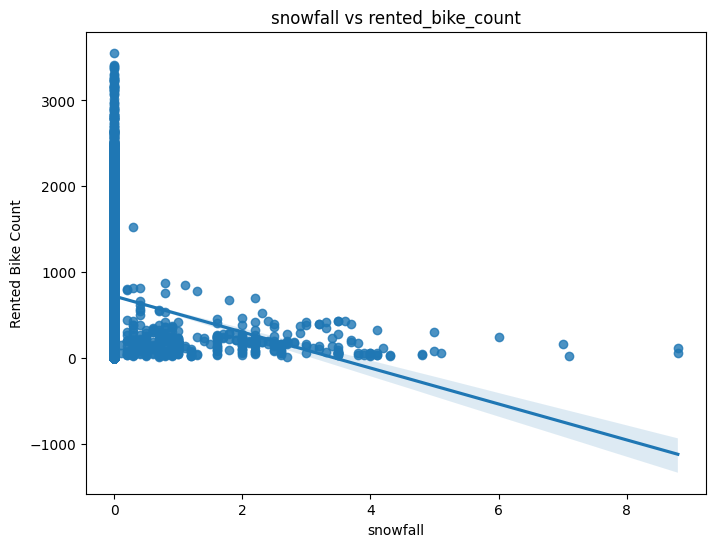

In [ ]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(8,6))
  sns.regplot(x=i,y=dependent_variable[0],data=data_2)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.

##### 2. What is/are the insight(s) found from the chart?

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helped a little bit from this we got to know that there are few variables which are showing some patterns with dependent variable this variable are maybe important feature while predicting for rented bike count so business needs focus on these variables.

#### Chart - 4 : Categorical variables with dependent variable (Bivariate)

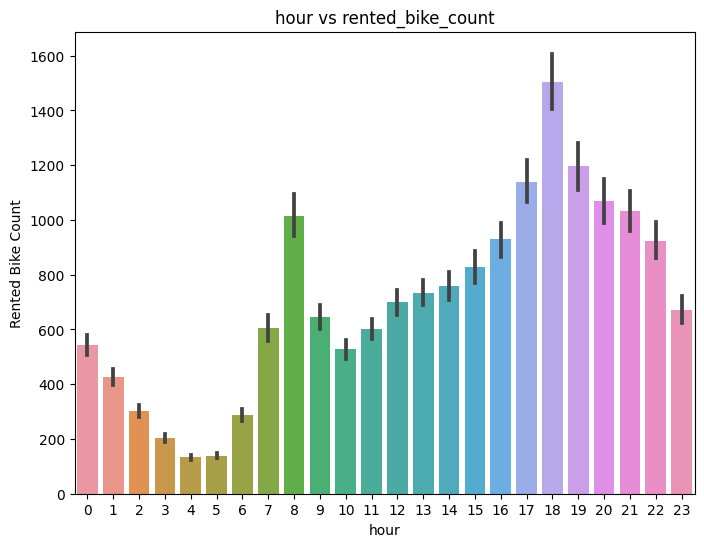

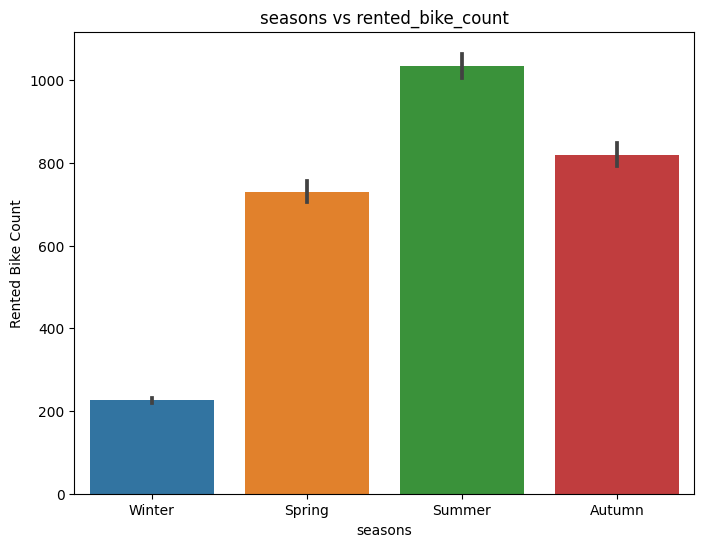

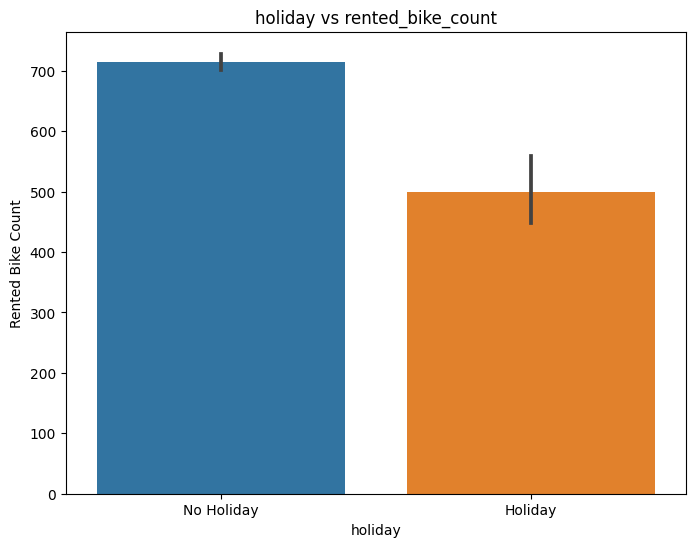

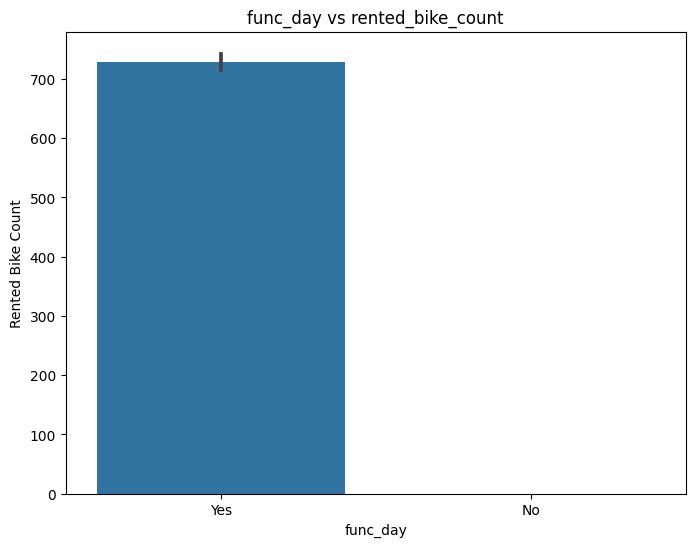

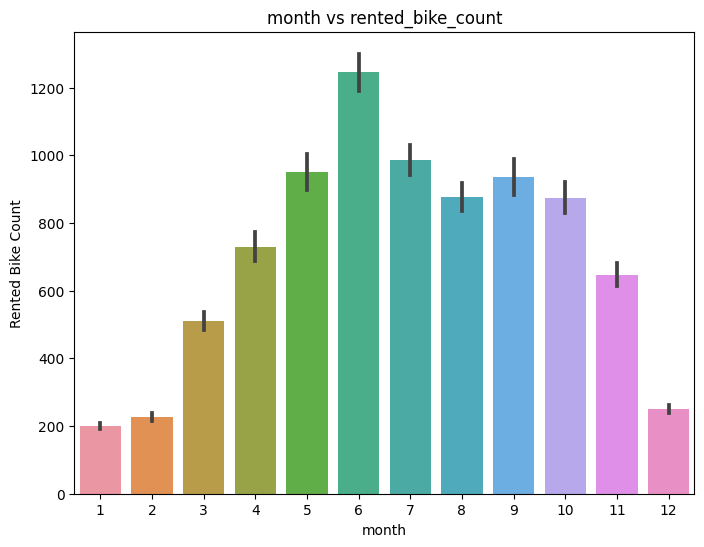

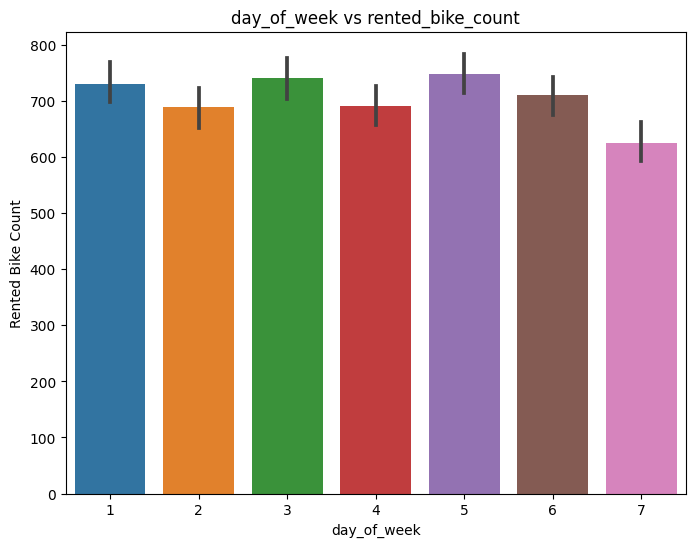

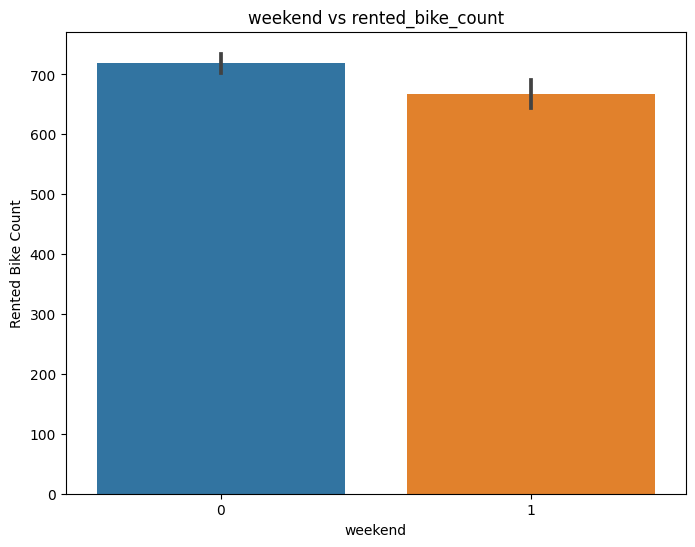

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(8,6))
  sns.barplot(x=i,y=dependent_variable[0],data=data_2)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the rented bike count with other categorical variables we used bar charts.

##### 2. What is/are the insight(s) found from the chart?

From above bar charts we got insights:

1. In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock.
2. From season vs rented bike chart there is more demand in summer and less demand in winter.
3. From day_of_week vs rented bike chart there is high demand on working days.
4. From month chart we know that there is high demand in month of june.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical varible we got to know that when demand for bike is more so we can focus more on that portion.

#### Chart - 5 : Rented Bike vs Hour

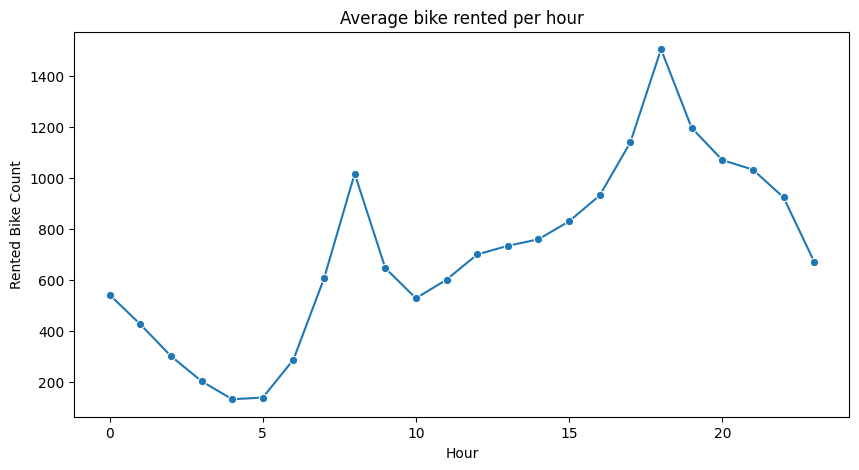

In [ ]:
# ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data_2.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.ylabel("Rented Bike Count")
plt.xlabel("Hour")
plt.title('Average bike rented per hour')
plt.show()
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how rented bike demand is distributed over 24 hours time we used line plot.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot, as well as try to meet the demand on that time slot.

#### Chart - 6 : Bike demand throughout the day (Multivariate)

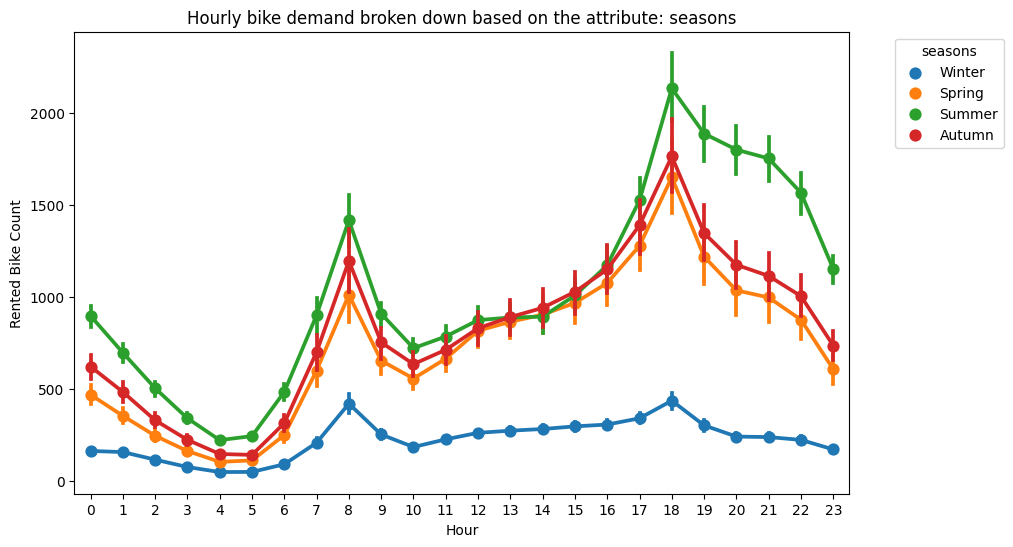

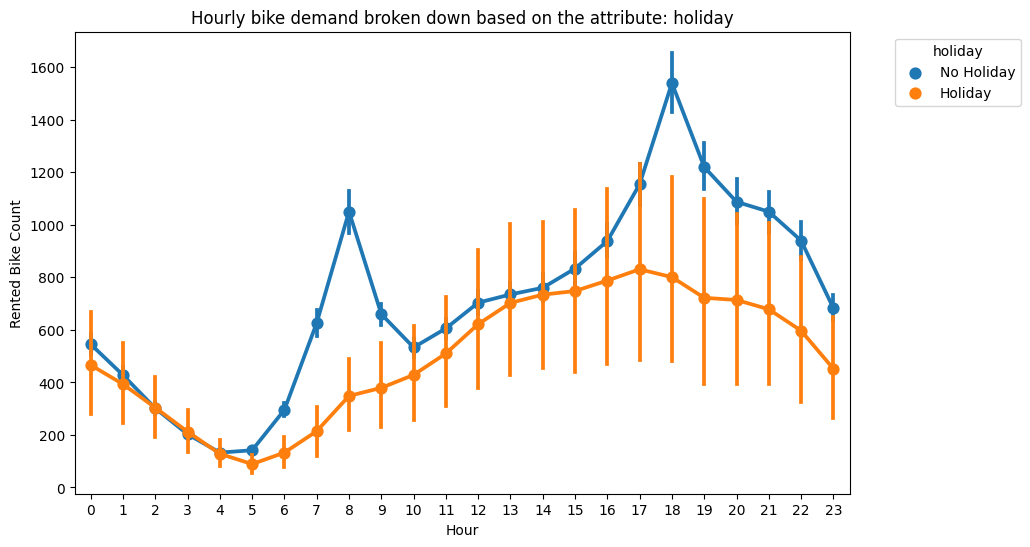

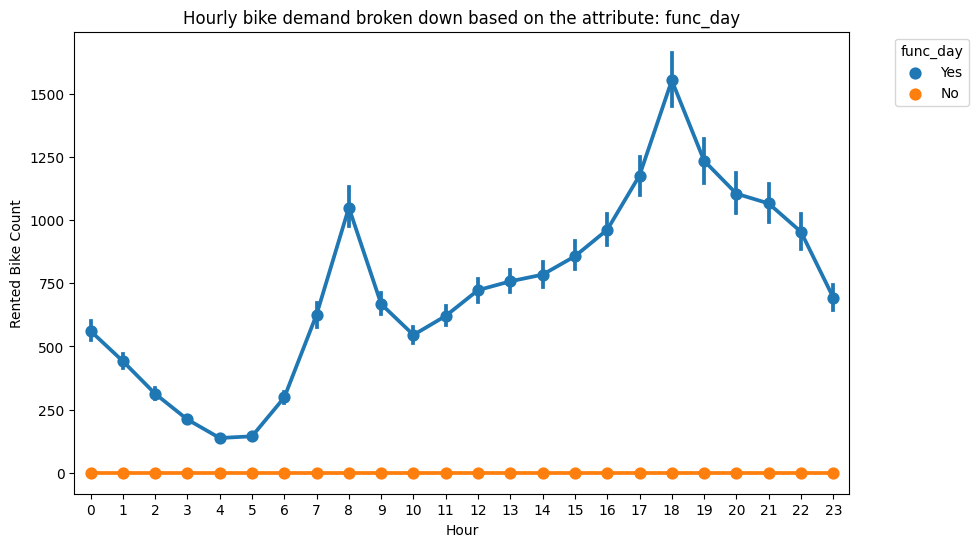

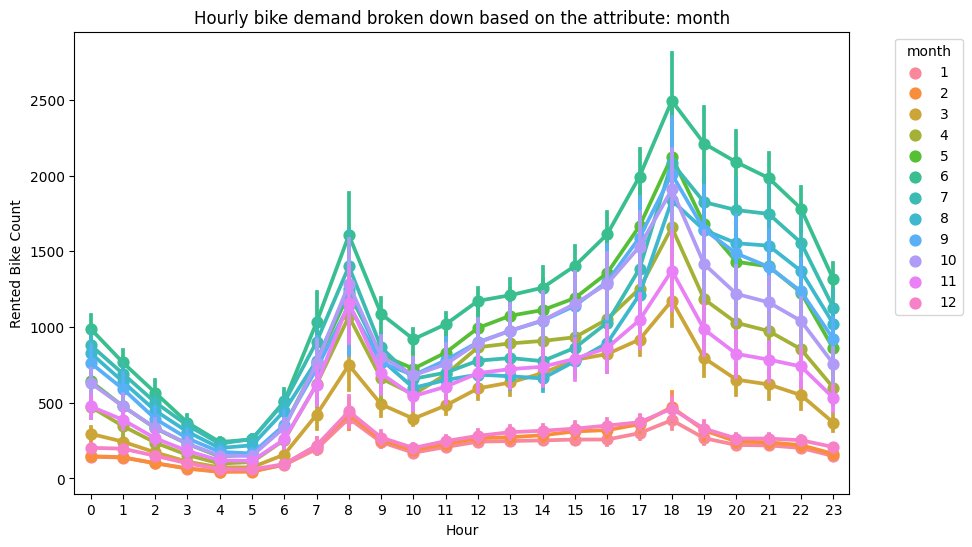

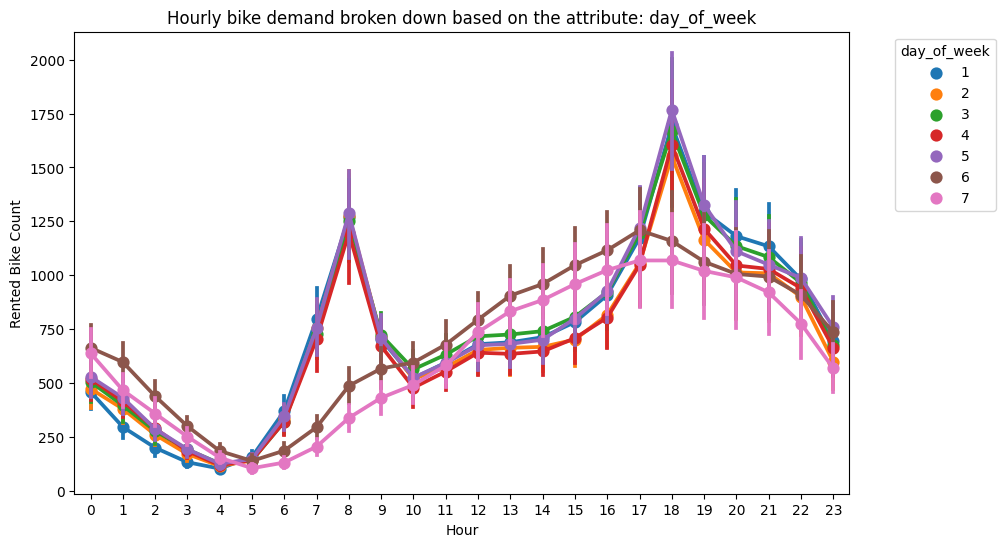

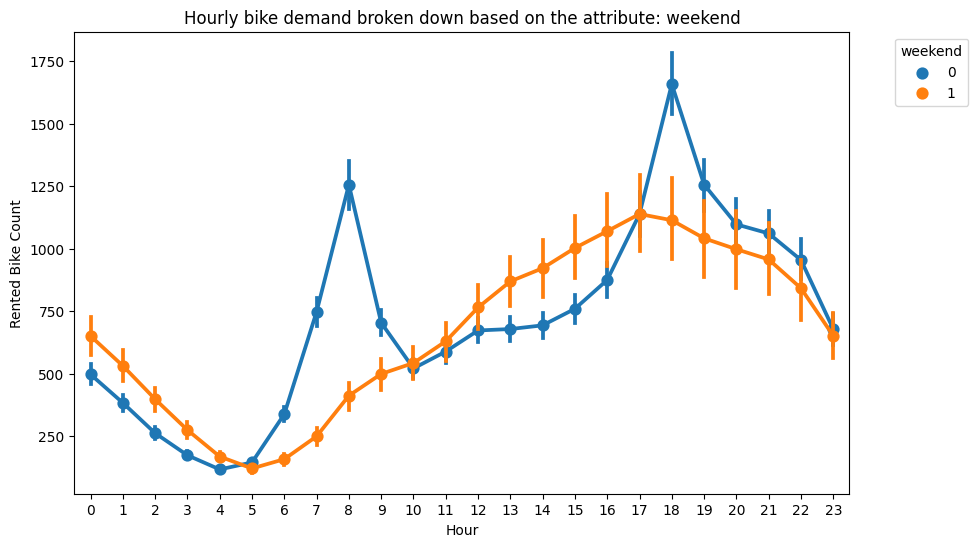

In [ ]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.pointplot(data=data_2, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.ylabel("Rented Bike Count")
    plt.xlabel("Hour")
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To show the demand of rented bike throughout the day on the basis of other categorical variable we used line plot drawing multiple lines on charts. 

##### 2. What is/are the insight(s) found from the chart?

From above line plots we see that :

1. In winter season there is no significant demand even in the morning or in the evening.
2. On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3. Around 3 months in winter season (i.e December, January & February) there is low demand.
4. On weekend almost throught the day there is demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 7 : Categorical plot for seasons

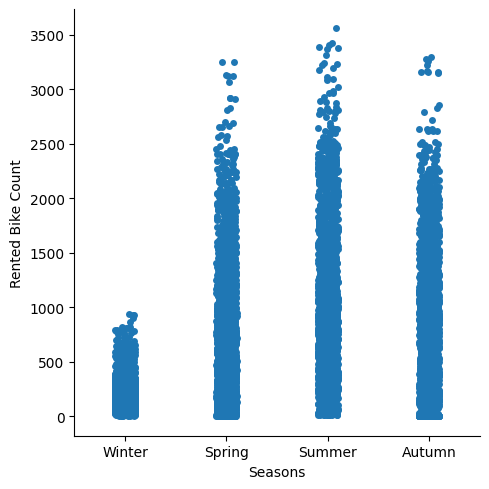

In [ ]:
# plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=data_2)
plt.ylabel("Rented Bike Count")
plt.xlabel("Seasons")
plt.show()

##### 1. Why did you pick the specific chart?

Catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got to know that:

1. There is low demand in winter 
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### Chart - 8 : Pie plot for seasons

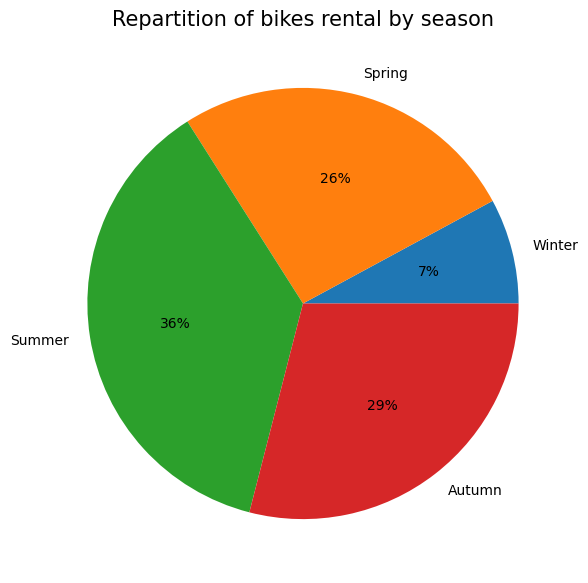

In [ ]:
# Chart - 8 visualization code
Winter=data_2[data_2["seasons"]=='Winter'].sum()
Spring=data_2[data_2["seasons"]=='Spring'].sum()
Summer=data_2[data_2["seasons"]=='Summer'].sum()
Autumn=data_2[data_2["seasons"]=='Autumn'].sum()

BikeSeasons={"Winter":Winter["rented_bike_count"],"Spring":Spring["rented_bike_count"],"Summer":Summer["rented_bike_count"],"Autumn":Autumn["rented_bike_count"]}
plt.gcf().set_size_inches(7,7)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of seasons

##### 2. What is/are the insight(s) found from the chart?

From above pie chart:

1. In year data season summer contributes around 36% then autumn around 29% 
2. Lowest demand in winter, it contributes around only 7% 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season variable, which clearly gave indication about demand.

#### Chart - 9 : Temperature and Solar Radiation over time

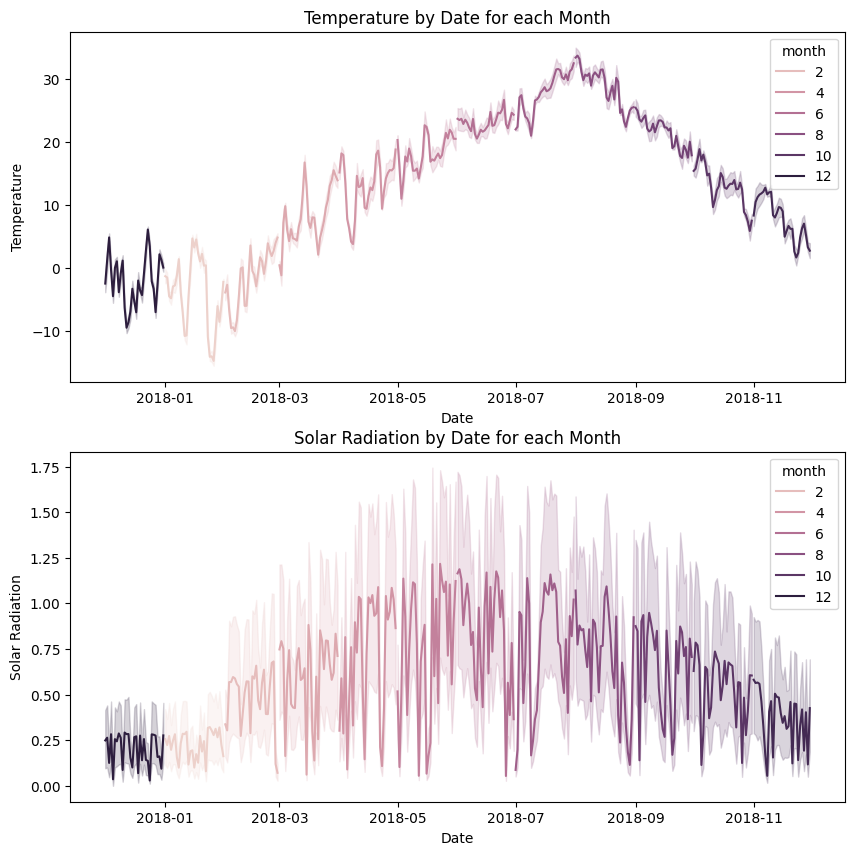

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,10))

# Plot temperature
plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='temperature', hue='month', data=data_2)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature by Date for each Month")

# Plot humidity
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='solar_radiation', hue='month', data=data_2)
plt.ylabel('Solar Radiation')
plt.xlabel('Date')
plt.title("Solar Radiation by Date for each Month")
plt.show()

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.

##### 2. What is/are the insight(s) found from the chart?

As expected temperature rises during summer months and lowers in winter months.

Similarly solar radiation is more in summer months compared to winter months, also huge fluctuations in solar radiation may be caused due to day-night cycle as there is no sunlight at night time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.

#### Chart - 10 : Avg Rented Bike Count by Wind speed

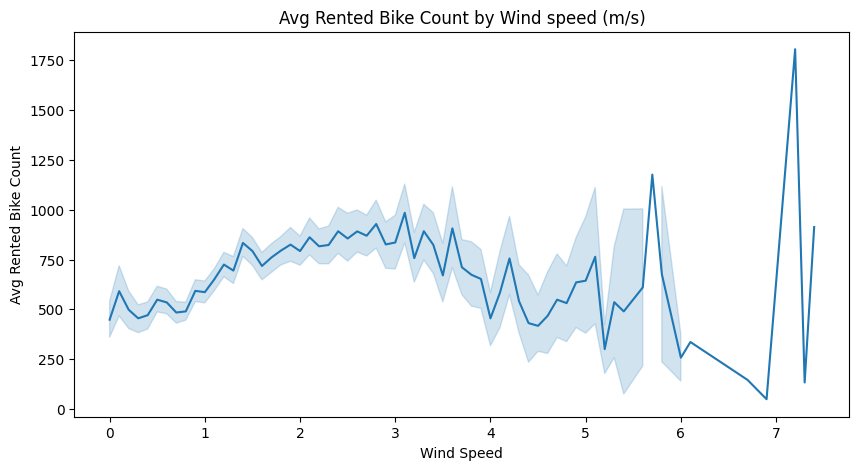

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='wind_speed', y='rented_bike_count', data=data_2)
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Wind Speed")
plt.title("Avg Rented Bike Count by Wind speed (m/s)")
plt.show()

In [ ]:
data_2['wind_speed'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: wind_speed, Length: 65, dtype: int64

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over wind speed).

##### 2. What is/are the insight(s) found from the chart?

Initially wind speed increases, the demand increases since flowing air creates better weather and less heat, although too high wind speed created storm and all so too high speed leads to decreases in demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.

#### Chart - 11 : Avg Rented Bike Count by Humidity

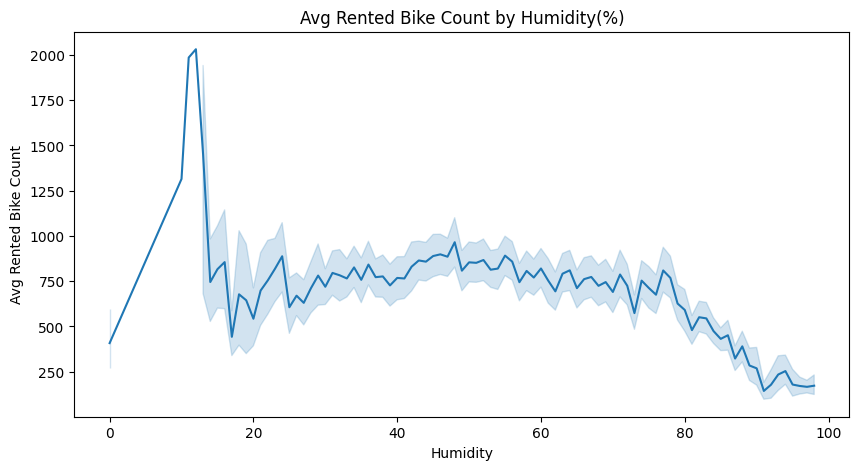

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='humidity', y='rented_bike_count', data=data_2)
plt.ylabel("Avg Rented Bike Count")
plt.xlabel("Humidity")
plt.title("Avg Rented Bike Count by Humidity(%)")
plt.show()

In [ ]:
data_2['humidity'].value_counts()

53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: humidity, Length: 90, dtype: int64

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time (in this case over humidity).

##### 2. What is/are the insight(s) found from the chart?

After certain level as humidity increases demand decreases as too much humidity may generally caused due to rain or snowfall as we already saw they leads to decrease in demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This may not be much helpful in creating positive business impact as this is a natural phenomenon and we can't control it.

#### Chart - 12 - Correlation Heatmap

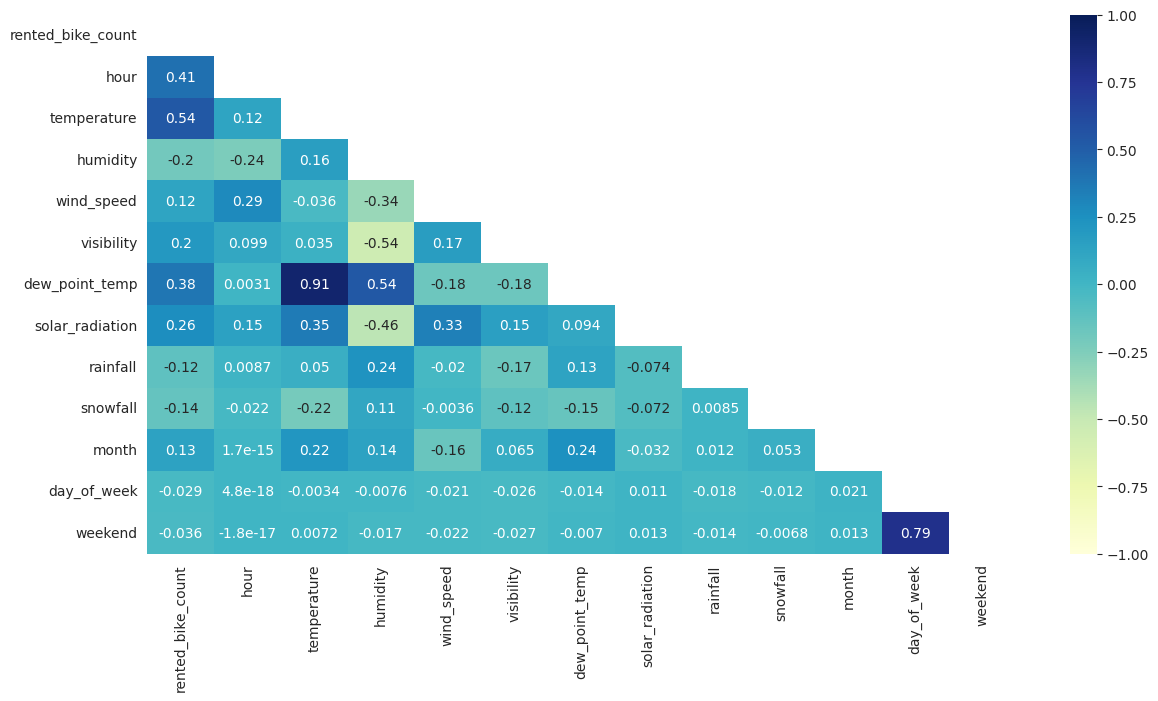

In [ ]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From above correlation map we can clearly see that:

1. There is high multicolinearity between independent variable (i.e temperature & dew point temp, humidity & dew point temp, weekend & day of week).
2. There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.
3. Other than that we didnt see any correlation.

#### Chart - 15 - Pair Plot 

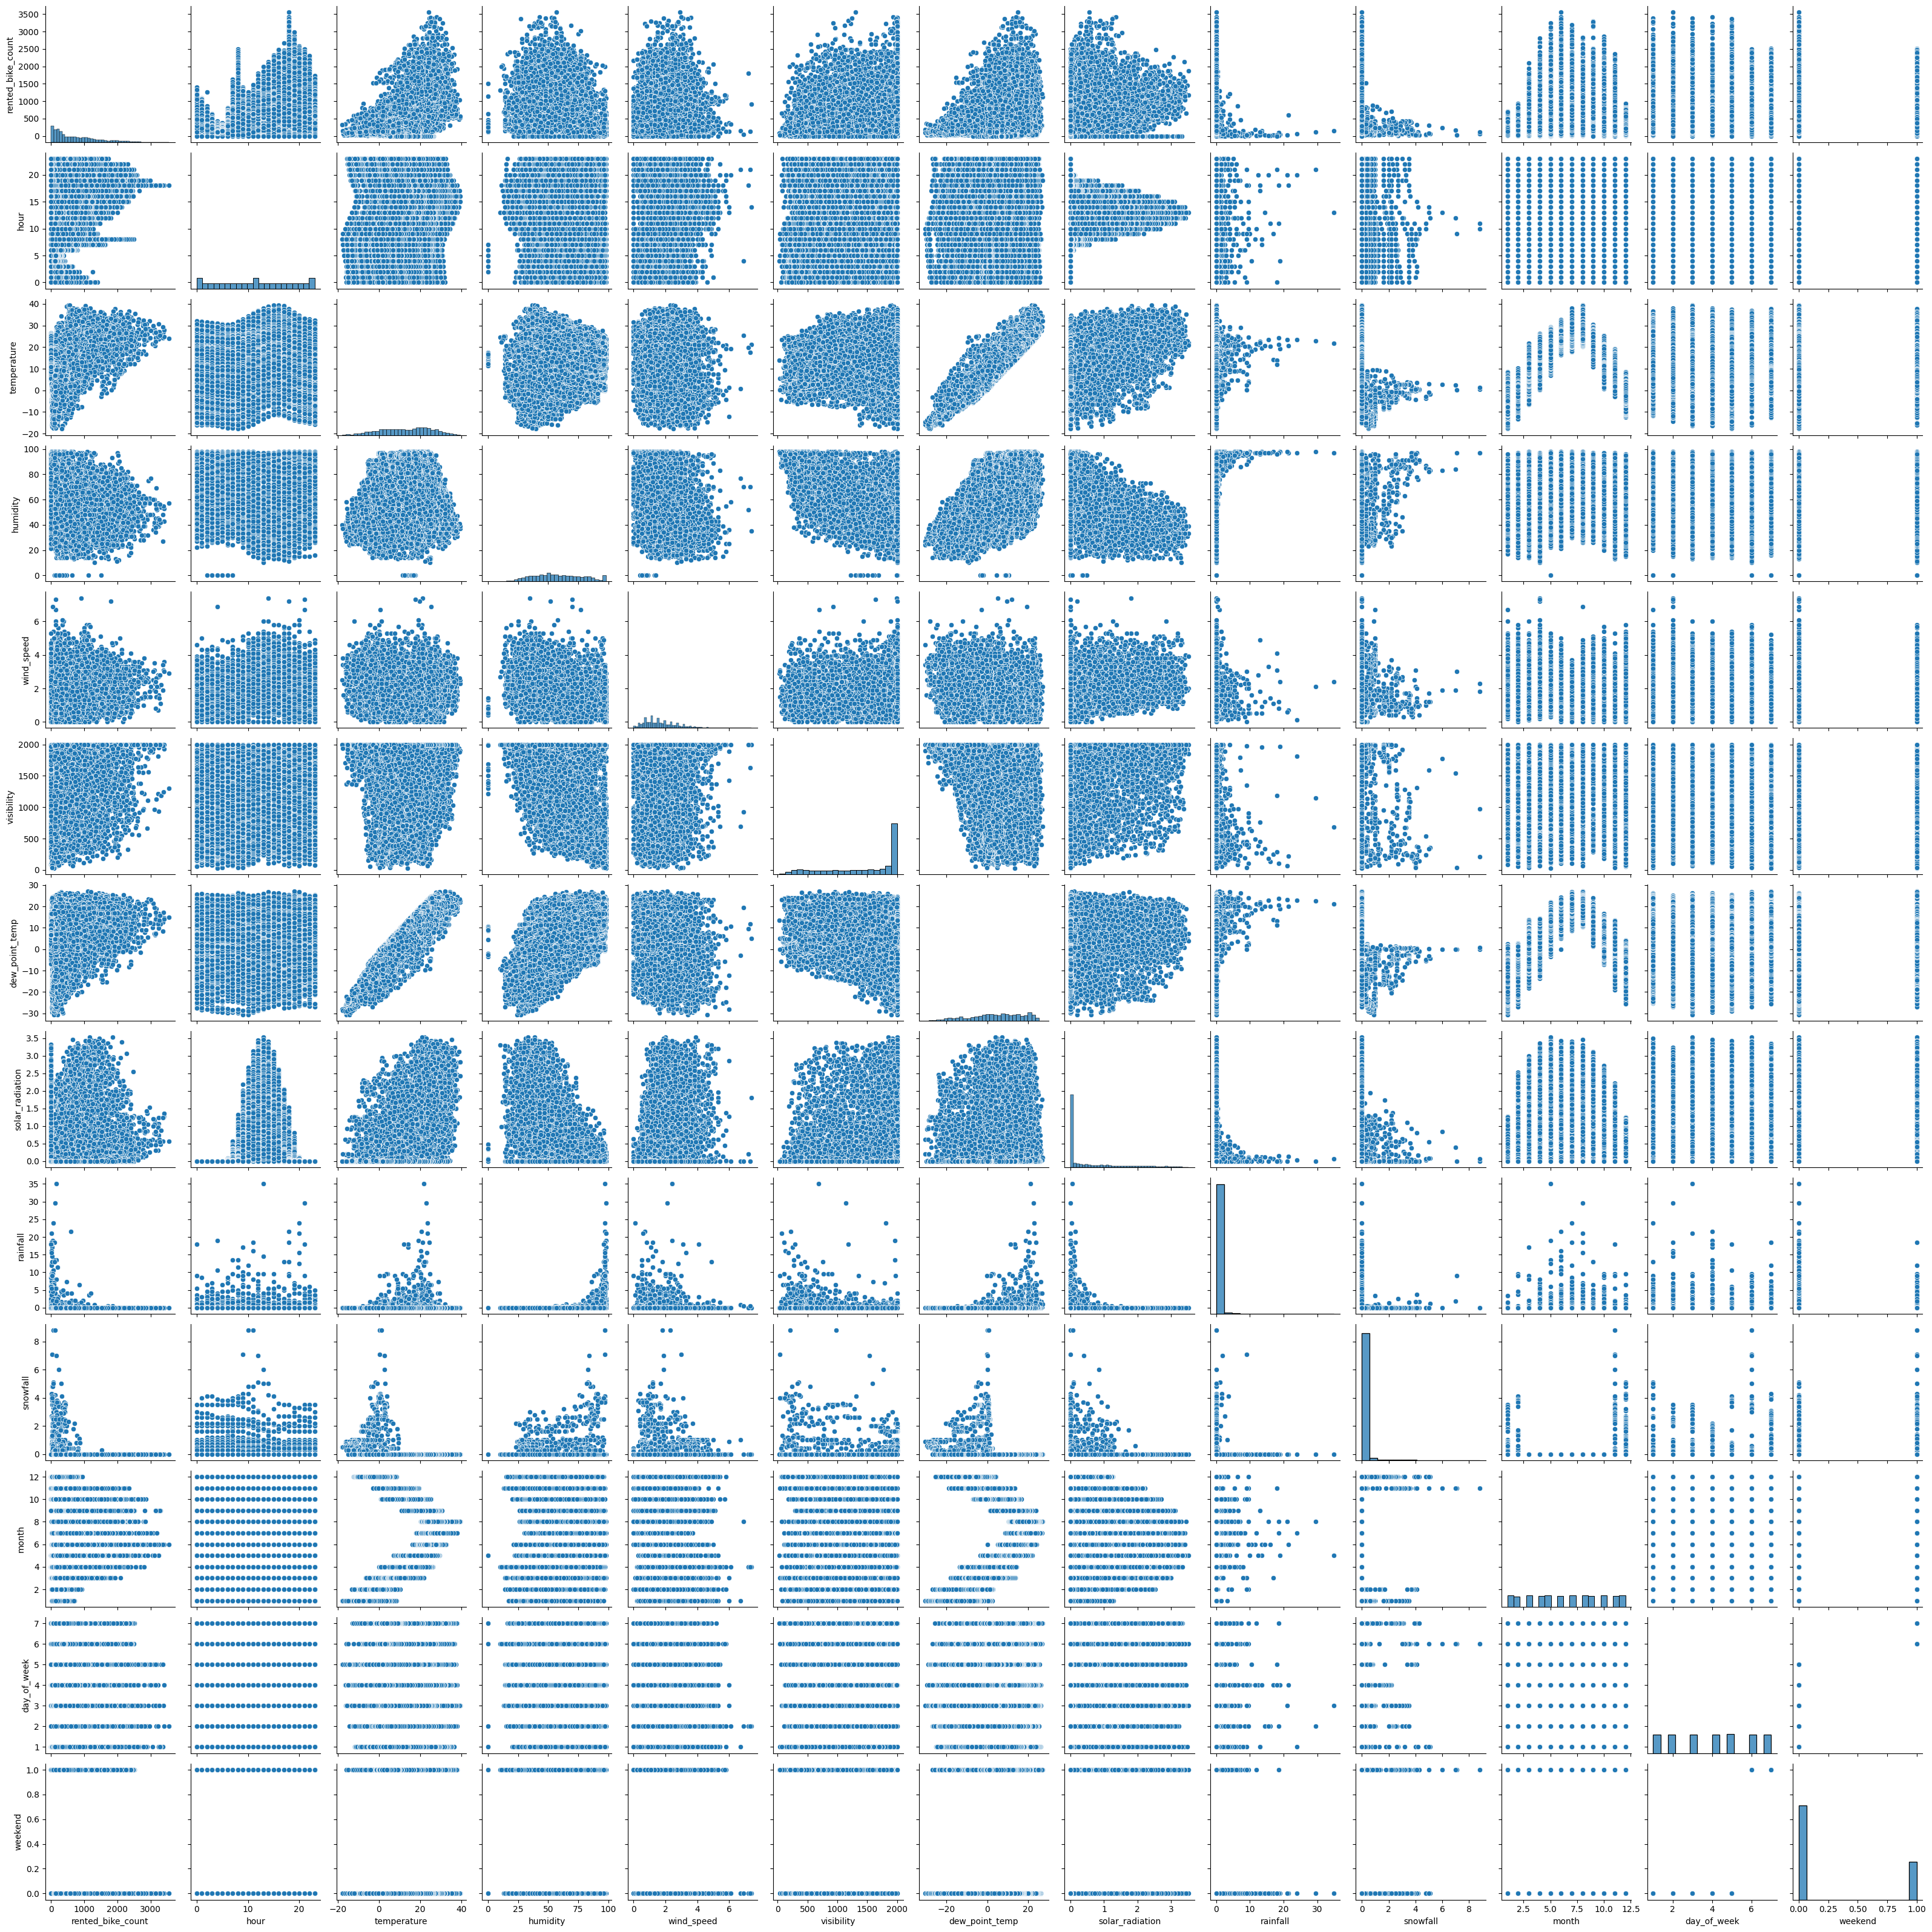

In [ ]:
# Pair Plot visualization code
sns.pairplot(data_2)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any relationship.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

**Business objective attained as follows:** 



*  To produce more growth in this business, the availability of bike service in morning and evening time should be higher compare to other timings.

*  Provide good bike sharing service mainly in summer time. In the month of june, requirement of bike service is high.

*   Be proactive with all the customers.

*   Ask for feedback often.

*   Look at the customers facing problem on using the bike sharing service.

*   Regular Service Maintenance.

*   Stay competitive.



# **Conclusion**

The project successfully demonstrated the idea to produce more growth in business by using visualization techniques (EDA) to predict bike demand in Seoul. 

Some of the key points are:-

*   High demand in the morning (7-9 AM) and evening (5-7 PM) time
*   Less Demand in the winter season.
*   Highest demand in the month of june compare to other months of the year.
*   Higher demand in non-holidays compare to holidays.
*   Business growth is not so much affected by Solar radiation, wind speed & humidity.

Overall, the project provides a roadmap for future research in this area. The findings of this project can be extended to other cities with similar bike sharing systems, leading to more effective and efficient bike sharing operations, and better outcomes for all stakeholders.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***